#**TUGAS PRAKTIKUM MANDIRI 10 MACHINE LEARNING (NAIVE BAYES)**

Nama : Imelda Wahyuni

Nim : 0110222042

Sesi : Pagi

#**LATIHAN 1**

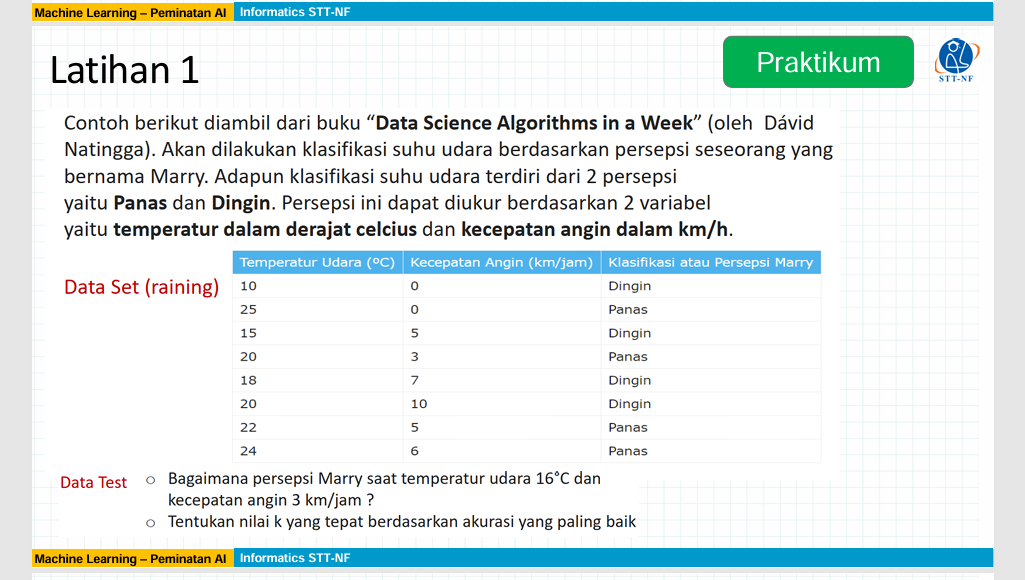

#**1. Import Library**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

Penjelasan:
- pandas → untuk membuat dan mengelola tabel data.
- KNeighborsClassifier → algoritma KNN yang akan digunakan

#**2. Membuat Dataset Training**

In [94]:
# Membuat dataset latihan 1
data = {
    "Temperatur": [10, 25, 15, 20, 18, 20, 22, 24],
    "Kecepatan_Angin": [0, 0, 5, 3, 7, 10, 5, 6],
    "Label": ["Dingin", "Panas", "Dingin", "Panas", "Dingin", "Dingin", "Panas", "Panas"]
}

df = pd.DataFrame(data)
df

,Temperatur,Kecepatan_Angin,Label
0,10,0,Dingin
1,25,0,Panas
2,15,5,Dingin
3,20,3,Panas
4,18,7,Dingin
5,20,10,Dingin
6,22,5,Panas
7,24,6,Panas


Penjelasan:

- Dataset berisi 8 baris data latihan.

- Tiap baris berisi:
  - Temperaturnya
  - Kecepatan angin
  - Persepsi Marry: Panas / Dingin
- pd.DataFrame() mengubah data menjadi tabel yang rapi.

#**3. Informasi Data**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temperatur       8 non-null      int64 
 1   Kecepatan_Angin  8 non-null      int64 
 2   Label            8 non-null      object
dtypes: int64(2), object(1)
memory usage: 324.0+ bytes


Terdapat 2 type data yaitu ada int64(2) dan object(1)

#**4. Mengecek Missing Value**

In [38]:
df.isnull().sum()

,0
Temperatur,0
Kecepatan_Angin,0
Label,0


Tidak terdapat nilai misisng value, semuanya sudah besih.

#**5. Memisahkan Fitur (X) dan Label (y)**

In [39]:
# Memisahkan fitur dan label
X = df[["Temperatur", "Kecepatan_Angin"]]
y = df["Label"]

print("Fitur X:")
print(X)
print("\nLabel y:")
print(y)

Fitur X:
   Temperatur  Kecepatan_Angin
0          10                0
1          25                0
2          15                5
3          20                3
4          18                7
5          20               10
6          22                5
7          24                6

Label y:
0    Dingin
1     Panas
2    Dingin
3     Panas
4    Dingin
5    Dingin
6     Panas
7     Panas
Name: Label, dtype: object


Penjelasan:
- KNN butuh input (X) dan output (y).
- Nilai X adalah variabel yang dipakai untuk menebak (temperatur & angin).
- Nilai y adalah jawaban sebenarnya (Panas/Dingin).

#**6. Membuat & Melatih Model KNN**

In [40]:
# Membuat model KNN dengan K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model
knn.fit(X, y)

print("Model berhasil dilatih!")

Model berhasil dilatih!


Penjelasan:
- KNN bekerja dengan mencari k tetangga terdekat, di sini k = 3.
- fit() membuat model belajar dari data X dan y.

#**7. Data yang Ingin Diprediksi**

In [41]:
# Input data uji
test_data = [[16, 3]]   # suhu 16°C, angin 3 km/jam

print("Data uji:", test_data)

Data uji: [[16, 3]]


Penjelasan:

Kode di atas menjelaskan terkait data uji yang akan diuji/diprediksi datanya.

#**8. Melakukan Prediksi**

In [42]:
# Melakukan prediksi
prediction = knn.predict(test_data)

print("Hasil prediksi:", prediction[0])

Hasil prediksi: Dingin


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Penjelasan:
- predict() akan mencari 3 tetangga terdekat.
- Menentukan mayoritas labelnya.
- Hasilnya 1 kata yaitu antara Panas atau Dingin.

#**Kesimpulan**

**Pertanyaan:**
1.   Bagaimana persepsi Marry saat temperatur 16°C dan angin 3 km/jam?
2.   Tentukan nilai k yang tepat berdasarkan akurasi yang paling baik.


**Jawaban:**
1. Persepsi Marry yaitu “Dingin”
2. Berdasarkan KNN (k=3), data (16°C, 3 km/jam) lebih dekat dengan data-data berlabel Dingin, sehingga prediksinya adalah Dingin.

--------------------------------------------------------------------------------------------------------------------------------------------------------------

#**LATIHAN 2**

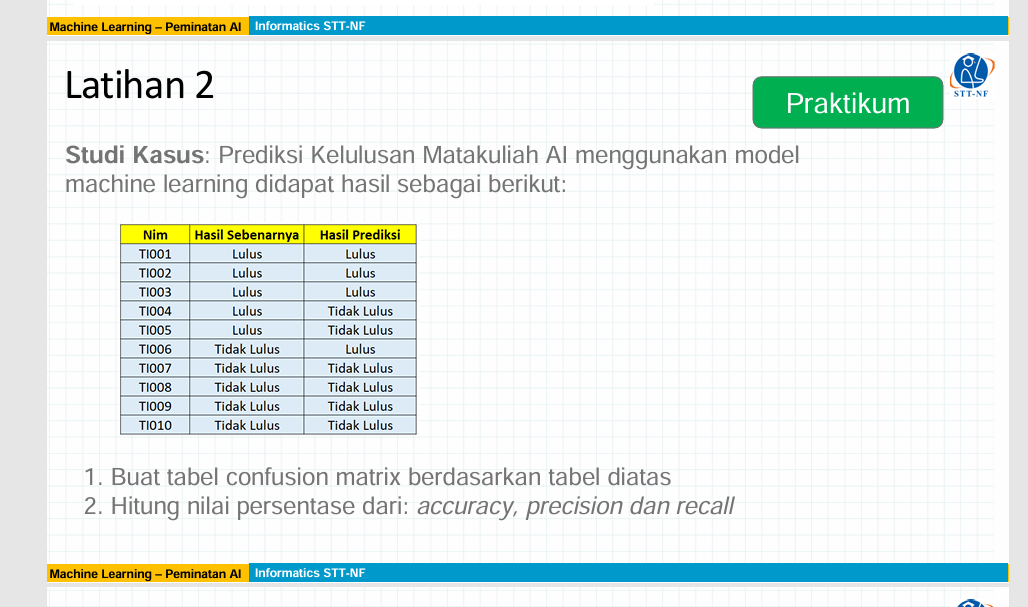

#**1. Import Library**

In [43]:
# Import library yang diperlukan
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

Penjelasan
- pandas → mengolah data dalam bentuk tabel
- confusion_matrix, accuracy_score, dll → menghitung metrik evaluasi model

#**2. Input Data**

In [44]:
# Input data berdasarkan tabel di soal
data = {
    "NIM": ["TI001","TI002","TI003","TI004","TI005","TI006","TI007","TI008","TI009","TI010"],
    "Actual": ["Lulus","Lulus","Lulus","Tidak Lulus","Lulus",
               "Tidak Lulus","Tidak Lulus","Tidak Lulus","Tidak Lulus","Tidak Lulus"],
    "Predicted": ["Lulus","Lulus","Lulus","Tidak Lulus","Tidak Lulus",
                  "Tidak Lulus","Tidak Lulus","Tidak Lulus","Tidak Lulus","Tidak Lulus"]
}

df = pd.DataFrame(data)
df


,NIM,Actual,Predicted
0,TI001,Lulus,Lulus
1,TI002,Lulus,Lulus
2,TI003,Lulus,Lulus
3,TI004,Tidak Lulus,Tidak Lulus
4,TI005,Lulus,Tidak Lulus
5,TI006,Tidak Lulus,Tidak Lulus
6,TI007,Tidak Lulus,Tidak Lulus
7,TI008,Tidak Lulus,Tidak Lulus
8,TI009,Tidak Lulus,Tidak Lulus
9,TI010,Tidak Lulus,Tidak Lulus


Penjelasan:

- Dataset berisi 10 baris data latihan.

- Tiap baris berisi:
  - NIM
  - Actual
  - Predicted
- pd.DataFrame() mengubah data menjadi tabel yang rapi.

#**3. Informasi Data**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NIM        10 non-null     object
 1   Actual     10 non-null     object
 2   Predicted  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


Hanya ada 1 type data saja yaitu object semua

#**4. Mengecek Missing Value**

In [46]:
df.isnull().sum()

,0
NIM,0
Actual,0
Predicted,0


Tidak ada nilai missing value.

#**5. Konversi Label ke Bentuk Numerik**

In [47]:
# Konversi kategori ke angka
df['Actual_num'] = df['Actual'].map({"Lulus":1, "Tidak Lulus":0})
df['Predicted_num'] = df['Predicted'].map({"Lulus":1, "Tidak Lulus":0})

y_true = df['Actual_num']
y_pred = df['Predicted_num']

df

,NIM,Actual,Predicted,Actual_num,Predicted_num
0,TI001,Lulus,Lulus,1,1
1,TI002,Lulus,Lulus,1,1
2,TI003,Lulus,Lulus,1,1
3,TI004,Tidak Lulus,Tidak Lulus,0,0
4,TI005,Lulus,Tidak Lulus,1,0
5,TI006,Tidak Lulus,Tidak Lulus,0,0
6,TI007,Tidak Lulus,Tidak Lulus,0,0
7,TI008,Tidak Lulus,Tidak Lulus,0,0
8,TI009,Tidak Lulus,Tidak Lulus,0,0
9,TI010,Tidak Lulus,Tidak Lulus,0,0


Mengubah label kategori menjadi angka
- Lulus : 1
- Tidak Lulus : 0

#**6. Membuat Confusion Matrix**

In [48]:
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

print("=== Confusion Matrix ===")
print(cm)

print(f"TP = {tp}")
print(f"TN = {tn}")
print(f"FP = {fp}")
print(f"FN = {fn}")

=== Confusion Matrix ===
[[6 0]
 [1 3]]
TP = 3
TN = 6
FP = 0
FN = 1


Penjelasan
- TP = Prediksi Lulus & Benar
- TN = Prediksi Tidak Lulus & Benar
- FP = Tidak Lulus diprediksi Lulus
- FN = Lulus diprediksi Tidak Lulus

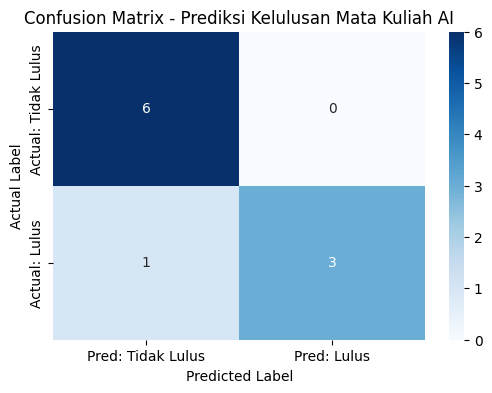

In [49]:
# Membuat tampilan grafik confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred: Tidak Lulus", "Pred: Lulus"],
            yticklabels=["Actual: Tidak Lulus", "Actual: Lulus"])

plt.title("Confusion Matrix - Prediksi Kelulusan Mata Kuliah AI")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Penjelasan :
- 6 = Actual Tidak Lulus, Prediksi Tidak Lulus (TN)

- 0 = Actual Tidak Lulus, Prediksi Lulus (FP)

- 1 = Actual Lulus, Prediksi Tidak Lulus (FN)

- 3 = Actual Lulus, Prediksi Lulus (TP)

#**7. Menghitung Accuracy, Precision, Recall**

In [50]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("=== Evaluation Metrics ===")
print(f"Accuracy  : {accuracy*100:.2f}%")
print(f"Precision : {precision*100:.2f}%")
print(f"Recall    : {recall*100:.2f}%")

=== Evaluation Metrics ===
Accuracy  : 90.00%
Precision : 100.00%
Recall    : 75.00%


Penjelasan:
- Accuracy = 80%
- Precision = 100% → tidak ada mahasiswa yang “tidak lulus” tapi diprediksi “lulus”
- Recall = 75% → ada 1 mahasiswa yang sebenarnya “lulus” tapi diprediksi “tidak lulus”

#**Kesimpulan**

Berdasarkan hasil prediksi menggunakan model klasifikasi, diperoleh confusion matrix sebagai berikut:
- 6 mahasiswa tidak lulus diprediksi benar tidak lulus
- 3 mahasiswa lulus diprediksi benar lulus

- 1 mahasiswa lulus diprediksi salah menjadi tidak lulus

- 0 mahasiswa tidak lulus diprediksi salah menjadi lulus

Dari hasil tersebut dihitung metrik evaluasi:

- Accuracy: 90%
Model cukup akurat secara keseluruhan, sebagian besar prediksi sesuai dengan kondisi sebenarnya.

- Precision: 100%
Artinya, semua mahasiswa yang diprediksi lulus benar-benar lulus. Tidak ada kesalahan prediksi positif.

- Recall: 75%
Model berhasil menangkap sebagian besar mahasiswa yang sebenarnya lulus, namun masih ada 1 yang salah diprediksi sebagai tidak lulus.

#**LATIHAN 3**

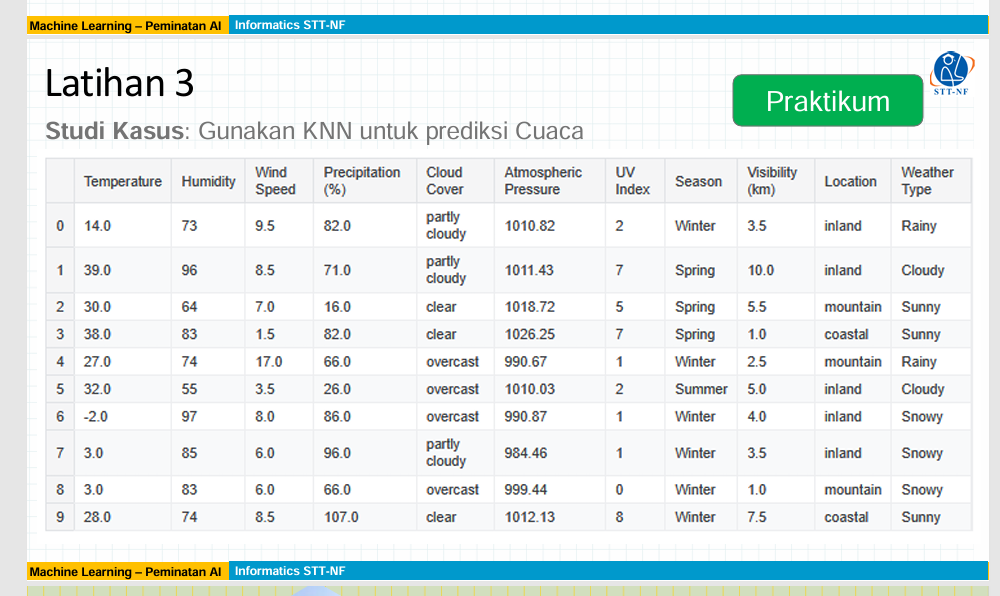

#**1. Import Library**

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Penjelasan:
- pandas → mengolah data tabel (DataFrame).

- numpy → operasi numerik/array.

- matplotlib.pyplot → membuat grafik.

- seaborn → visualisasi data yang lebih menarik.

- train_test_split → membagi data menjadi train & test.

- StandardScaler → menormalkan data numerik.

- LabelEncoder → mengubah data kategori menjadi angka.

- KNeighborsClassifier → algoritma KNN untuk klasifikasi.

- accuracy_score → menghitung akurasi model.

- classification_report → menunjukkan precision, recall, F1-score.

- confusion_matrix → melihat prediksi benar/salah dalam bentuk matriks.

#**2. Membuat Dataset**

In [53]:
data = {
    "Temperature": [14.0, 39.0, 30.0, 38.0, 27.0, 32.0, -2.0, 3.0, 3.0, 28.0],
    "Humidity": [73, 96, 64, 83, 74, 55, 97, 85, 83, 74],
    "Wind Speed": [9.5, 8.5, 7.0, 1.5, 17.0, 3.5, 8.0, 6.0, 6.0, 8.5],
    "Precipitation (%)": [82.0, 71.0, 16.0, 82.0, 66.0, 26.0, 86.0, 96.0, 66.0, 107.0],
    "Cloud Cover": ["partly cloudy", "partly cloudy", "clear", "clear", "overcast", "overcast", "overcast", "partly cloudy", "overcast", "clear"],
    "Atmospheric Pressure": [1010.82, 1011.43, 1018.72, 1026.25, 990.67, 1010.03, 990.87, 984.46, 999.44, 1012.13],
    "UV Index": [2, 7, 5, 7, 1, 2, 1, 1, 0, 8],
    "Season": ["Winter", "Spring", "Spring", "Spring", "Winter", "Summer", "Winter", "Winter", "Winter", "Winter"],
    "Visibility (km)": [3.5, 10.0, 5.5, 1.0, 2.5, 5.0, 4.0, 3.5, 1.0, 7.5],
    "Location": ["inland", "inland", "mountain", "coastal", "mountain", "inland", "inland", "inland", "mountain", "coastal"],
    "Weather Type": ["Rainy", "Cloudy", "Sunny", "Sunny", "Rainy", "Cloudy", "Snowy", "Snowy", "Snowy", "Sunny"]
}

df = pd.DataFrame(data)
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


Penjelasan:

- Dataset berisi 10 baris dan 11 kolom
- pd.DataFrame() mengubah data menjadi tabel yang rapi.

#**3. Informasi Data**

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           10 non-null     float64
 1   Humidity              10 non-null     int64  
 2   Wind Speed            10 non-null     float64
 3   Precipitation (%)     10 non-null     float64
 4   Cloud Cover           10 non-null     object 
 5   Atmospheric Pressure  10 non-null     float64
 6   UV Index              10 non-null     int64  
 7   Season                10 non-null     object 
 8   Visibility (km)       10 non-null     float64
 9   Location              10 non-null     object 
 10  Weather Type          10 non-null     object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1012.0+ bytes


Terdapat 3 type data yaitu ada float(5). int(2) dan object(4)

#**4. Mengecek Nilai Missing Value**

In [56]:
df.isnull().sum

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


Tidak ada missing value, semuanya bersih

#**5. Memisahkan Fitur dan Target**

In [84]:
X = df.drop("Weather Type", axis=1)
y = df["Weather Type"]

Penjelasan:
- X → semua data fitur (input) selain kolom Weather Type.
- y → kolom Weather Type yang akan diprediksi.

#**6. Encode Kolom Kategorikal**

In [85]:
label_encoders = {}
categorical_cols = ["Cloud Cover", "Season", "Location", "Weather Type"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,2,1010.82,2,2,3.5,1,1
1,39.0,96,8.5,71.0,2,1011.43,7,0,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,0,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,0,1.0,0,3
4,27.0,74,17.0,66.0,1,990.67,1,2,2.5,2,1
5,32.0,55,3.5,26.0,1,1010.03,2,1,5.0,1,0
6,-2.0,97,8.0,86.0,1,990.87,1,2,4.0,1,2
7,3.0,85,6.0,96.0,2,984.46,1,2,3.5,1,2
8,3.0,83,6.0,66.0,1,999.44,0,2,1.0,2,2
9,28.0,74,8.5,107.0,0,1012.13,8,2,7.5,0,3


Endocing kolom kategorikal "Cloud Cover", "Season", "Location", "Weather Type" menjadi numerik.

#**7. Scaling**

In [86]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Penjelasan:
- scaler = StandardScaler() → membuat alat untuk menormalkan data.
- X_scaled = scaler.fit_transform(X) → menormalkan semua fitur di X supaya skalanya sama.

#**8. Train-Test Split**

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

Penjelasan:
- train_test_split() → membagi data menjadi data latih (train) dan data uji (test).

- X_train, y_train → digunakan untuk melatih model.

- X_test, y_test → digunakan untuk menguji/mengetes hasil model.

- test_size=0.3 → 30% data untuk testing, 70% untuk training.

- random_state=42 → supaya hasil pembagian data tetap sama setiap dijalankan.

#**9. Training Model KNN**

In [88]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#**10. Prediksi dengan Model**

In [90]:
y_pred = knn.predict(X_test)

print("=== Evaluation Metrics ===")
print(f"Accuracy  : {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== Evaluation Metrics ===
Accuracy  : 33.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0

    accuracy                           0.33         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.33      0.33      0.33         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Akurasi model hanya 33% karena jumlah datanya sangat sedikit. Setelah dibagi train–test, data uji hanya 3 baris sehingga hasil evaluasi jadi tidak stabil. Selain itu, beberapa jenis cuaca cuma muncul 1–2 kali, jadi model kesulitan belajar polanya. Akibatnya, ada kelas yang tidak bisa diprediksi sama sekali, sehingga precision dan recall-nya jadi 0. Jadi hasilnya rendah bukan karena modelnya salah, tetapi karena datanya terlalu sedikit dan tidak seimbang.

#**11. Confusion Matrix Grafik**

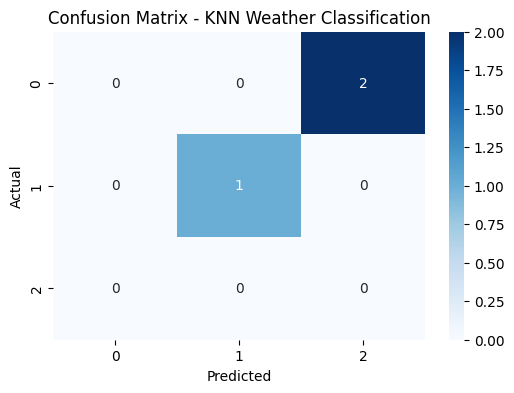

In [91]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN Weather Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#**12. Menghitung Accuracy, Precision, Recall**

In [81]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("=== Evaluation Metrics ===")
print(f"Accuracy  : {accuracy*100:.2f}%")
print(f"Precision : {precision*100:.2f}%")
print(f"Recall    : {recall*100:.2f}%")

=== Evaluation Metrics ===
Accuracy  : 33.33%
Precision : 33.33%
Recall    : 33.33%


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kode di atas menghitung tiga metrik evaluasi, yaitu accuracy, precision, dan recall.

- Accuracy mengukur seberapa banyak prediksi yang benar.

- Precision mengukur ketepatan model dalam memprediksi suatu kelas.

- Recall mengukur kemampuan model menemukan data yang benar pada setiap kelas.

Hasil yang muncul semuanya 33.33%, karena dataset sangat kecil dan tidak seimbang, sehingga model kekurangan contoh untuk mempelajari semua kelas. Akibatnya, precision dan recall untuk kelas tertentu tidak bisa dihitung, sehingga muncul peringatan dari sklearn.

#**KESIMPULAN**

Model KNN belum mampu melakukan klasifikasi dengan baik pada dataset cuaca yang digunakan. Hal ini terlihat dari nilai Akurasi, Precision, dan Recall yang hanya sebesar 33.33%, yang menunjukkan bahwa model hanya benar sekitar 1 dari 3 prediksi. Selain itu, munculnya peringatan UndefinedMetricWarning menandakan bahwa ada beberapa kelas yang tidak terprediksi sama sekali, sehingga kinerja model menjadi tidak optimal. Secara keseluruhan, model perlu peningkatan pada preprocessing, pemilihan fitur, atau tuning parameter K agar performanya lebih baik.